# Data Exploration for Ames Housing Dataset

You can find more information about the Ames Housing Dataset here:
https://github.com/bangwu93/Data-Science-Exploration/blob/master/Ames%20Housing%20Dataset%20Information
https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
Additional Documentation by Author of Dataset: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Key Information:
Dataset contains 2930 observations, 80 independent variables. (23 Nominal, 23 Ordinal, 14 Discrete and 20 Continuous)
Training Set contains 1460 observations, 80 independent variables.

Response Variable: SalePrice

Nominal Variables (Categorical):
MS Sub Class, MS Zoning, Street, Alley, Land Contour, Lot Config, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style
Roof Style, Roof Matl, Exterior 1, Exterior 2, Mas Vnr Type, Foundation, Heating, Central Air, Garage Type, Misc Feature
Sale Type, Sale Condition

Ordinal Variables:


In [2]:
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
import numpy as np #foundational package for scientific computing
import scipy as sp #collection of functions for scientific computing and advance mathematics
import sklearn #collection of machine learning algorithms
import seaborn as sns

In [20]:
data_raw = pd.read_csv("train.csv")

print(data_raw.info(null_counts = 1))
print(data_raw.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We notice that for the following variables, null values exist.
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object    

The question then is what to do with these variables.

## Response Variable - SalePrice

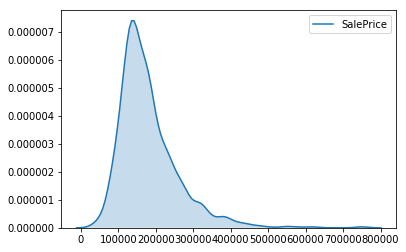

In [22]:
sns.kdeplot(data_raw.SalePrice, shade = True)

SalePrice is a right-skewed distribution. 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


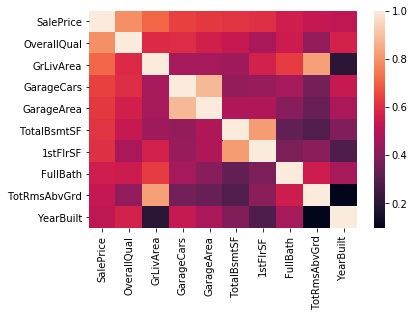

In [51]:
corr_with_sales_price = data_raw.corr().loc[:, "SalePrice"].sort_values(ascending = False)

print(corr_with_sales_price.nlargest(n=10))

print(sns.heatmap(data_raw.loc[:, corr_with_sales_price.nlargest(n=10).index].corr()))

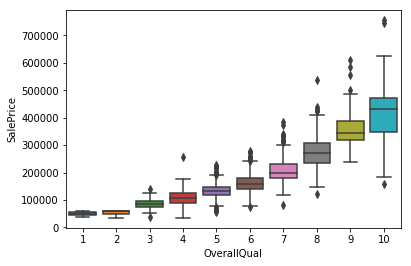

In [58]:
sns.boxplot(y = "SalePrice", x = "OverallQual", data = data_raw)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


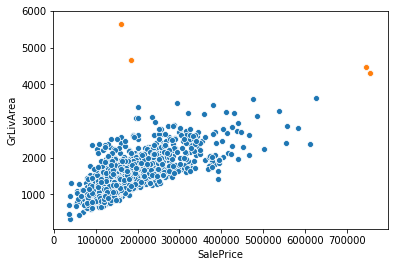

In [62]:
print(sns.scatterplot(x = "SalePrice", y = "GrLivArea", data = data_raw))

print(sns.scatterplot(x = "SalePrice", y = "GrLivArea", data = data_raw.loc[(data_raw.loc[:,"GrLivArea"] > 4000), :]))

We notice two potential outlier that appears to buck the trend.

According to the documentation, three datapoints consist of partial sales that are not part of the usual sales, and therefore can be discarded for our analysis.

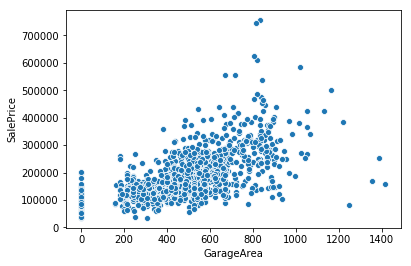

In [65]:
sns.scatterplot(y = "SalePrice", x = "GarageArea", data = data_raw)